# Result analysis

## Dependencies

In [1]:
import pandas as pd
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_palette('colorblind')


## Simulation results

In [2]:
df = pd.read_csv('data/processed/results-analysis.csv')
df


,Max CPU,Min,Media,Max,Std,Var
0,10,226.79,226.790,226.79,0.000,0.000
1,9,226.79,226.790,226.79,0.000,0.000
2,8,226.79,226.790,226.79,0.000,0.000
3,7,226.79,226.790,226.79,0.000,0.000
4,6,226.79,226.790,226.79,0.000,0.000
5,5,226.79,226.790,226.79,0.000,0.000
6,4,226.79,226.790,226.79,0.000,0.000
7,3,234.96,237.367,251.28,4.797,23.016
8,2,258.99,271.288,291.81,10.139,102.810
9,1,483.61,484.771,495.22,3.483,12.131


## Optimization curves

In [3]:
# Find knee point in Min
knee_locator = KneeLocator(df['Max CPU'], df['Min'], curve='convex', direction='decreasing')
knee_locator.knee

2

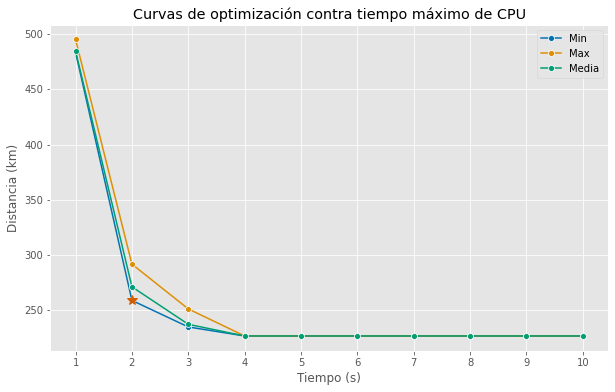

In [4]:
plt.figure(figsize=(10, 6))
# Add a label to each line
ax = sns.lineplot(x='Max CPU', y='Min', data=df, marker='o')
ax = sns.lineplot(x='Max CPU', y='Max', data=df, marker='o')
ax = sns.lineplot(x='Max CPU', y='Media', data=df, marker='o')
# Plot the knee point
plt.plot(knee_locator.knee, knee_locator.knee_y, marker='*', markersize=10)
plt.title('Curvas de optimización contra tiempo máximo de CPU')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (km)')
plt.xticks(np.arange(1, df['Max CPU'].max() + 1, step=1));
# add legend
plt.legend(['Min', 'Max', 'Media']);

# Save figure
plt.savefig('img/curvas-opt.png', dpi=300)


In [5]:
knee_locator = KneeLocator(df['Max CPU'], df['Var'], curve='convex', direction='decreasing')
knee_locator.knee

4

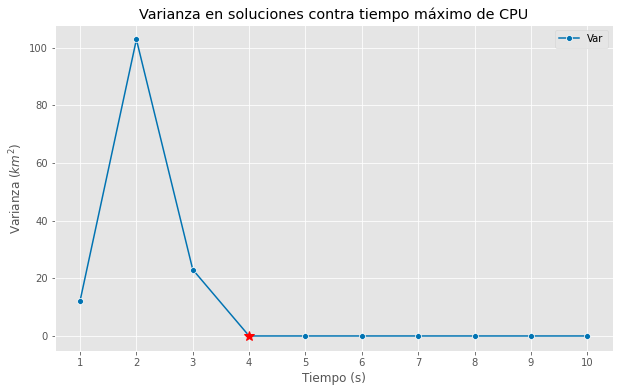

In [6]:
plt.figure(figsize=(10, 6))
ax2 = sns.lineplot(x='Max CPU', y='Var', data=df, marker='o')
plt.plot(knee_locator.knee, knee_locator.knee_y, marker='*', markersize=10, color='r')
plt.title('Varianza en soluciones contra tiempo máximo de CPU')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza $(km^2)$')
plt.xticks(np.arange(1, df['Max CPU'].max() + 1, step=1));
plt.legend(['Var']);
plt.savefig('img/varianza-opt.png', dpi=300)
